In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# DT2470 Lab 01: Teh Signal Processings

by Bob L. T. Sturm

In this first lab you will practice some fundamental concepts of signal processing. You will analyse a chosen sampled sound in the time-, frequency-, and time-frequency domains. You will write something intelligent about your analysis, observing things like periodicity, frequency content, harmonicity, etc. You will also learn to extract low-level features from audio and music signals. In the next lab, you will use these features for some machine learning madness.

The lab report you submit should be a testament to your intelligence, as well as a reflection of your willingness to be a part of this module. You are free to use whatever software you want, e.g., python, MATLAB, Processing, C++, etc. But I give tips below in python. Here's some helpful links as well:

- [Numpy API](https://docs.scipy.org/doc/numpy-1.13.0/index.html)
- [Scikit-learn API](https://scikit-learn.org/stable/)
- [MatPlotlib API](https://matplotlib.org/3.1.1/api/index.html)
- [Numpy Cheat Sheet](https://www.dataquest.io/blog/numpy-cheat-sheet/)
- [Pydub API](https://github.com/jiaaro/pydub/blob/master/API.markdown)

I also include some images so you can confirm whether you are on the right track, or just to have a brief pause to laugh at how far your answer is from being correct.

# Part 1: Basics

1. Choose an audio file to work with from http://bbcsfx.acropolis.org.uk. Download it, load it using pydub (see [pydub.AudioSegment](https://github.com/jiaaro/pydub/blob/master/API.markdown)), and plot a portion of the waveform with the appropriate axes labeled "Amplitude" and "Time (s)". The time axis **must be** in seconds. (Use the sample rate of your soundfile to find that.) If your audio file has more than one channel, just look at one channel.

> Below is the first 10 seconds of my selected audio waveform. Yours should appear nearly as beautiful.
![07075029plot.png](attachment:07075029plot.png)

In [ ]:
def pydub_to_np(audio):
    """
    Converts pydub audio segment into np.float32 of shape [duration_in_seconds*sample_rate, channels],
    where each value is in range [-1.0, 1.0]. 
    Returns tuple (audio_np_array, sample_rate).
    """
    #return np.array(audio.get_array_of_samples(), dtype=np.float32).reshape(-1, audio.channels) / (
    #        1 << (8 * audio.sample_width - 1))
    return np.asarray([(ele/2**16.)*2 for ele in np.array(audio.get_array_of_samples(), dtype=np.float32).reshape(-1, audio.channels) ])

In [ ]:
# Now we plot the entire audio file
import pydub
import matplotlib.pyplot as plt
import numpy as np

import librosa
import librosa.display

from pydub import AudioSegment
from pydub.playback import play

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# add your code below

sound = pydub.AudioSegment.from_file("vhs.wav", format="wav")
seconds_10 = 10*1000
sound_10 = sound[:seconds_10]
sound_np = pydub_to_np(sound_10)

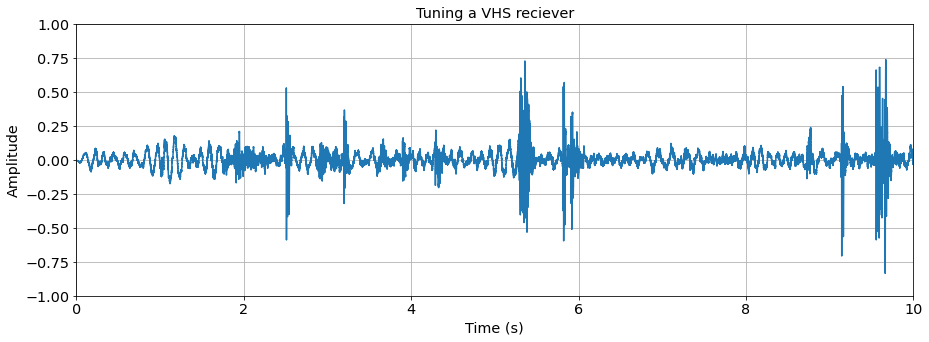

In [ ]:
plt.plot(sound_np[:,0])
#plt.plot(sound_np[:,1])
plt.title("Tuning a VHS reciever")
plt.ylim([-1, 1])
plt.margins(x=0)
plt.xticks(np.arange(0,len(sound_np[:,0])+1,int(len(sound_np[:,0])/5)), np.arange(0,10+1,2))
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


2. With the audio file you have chosen, zoom into two different 100 ms portions that have audio data and plot them. 

>Below is what mine looks like. We can see the sound appears quite different at both times. At  about 2500 ms we see a sudden rise that decays and oscillates. At about 26 s we see a noisy waveform that has a small amplitude. 

![07075029plot2.png](attachment:07075029plot2.png)

In [ ]:
# add your code below
start_1 = 2500; start_2 = 25500; range_limit = 100
sound1 = pydub_to_np(sound[start_1:start_1 + range_limit])[:,0] #channel 0
sound2 = pydub_to_np(sound[start_2:start_2 + range_limit])[:,0] #channel 0


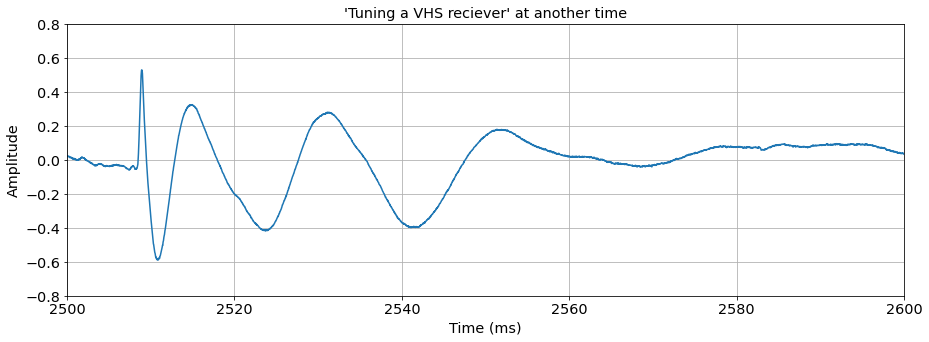

In [ ]:
plt.plot(sound1)
plt.title("'Tuning a VHS reciever' at another time")
plt.ylim([-0.8, 0.8])
plt.margins(x=0)
plt.xticks(np.arange(0,len(sound1)+1,int(len(sound1)/5)), np.arange(start_1,start_1 + range_limit+1, 20))
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

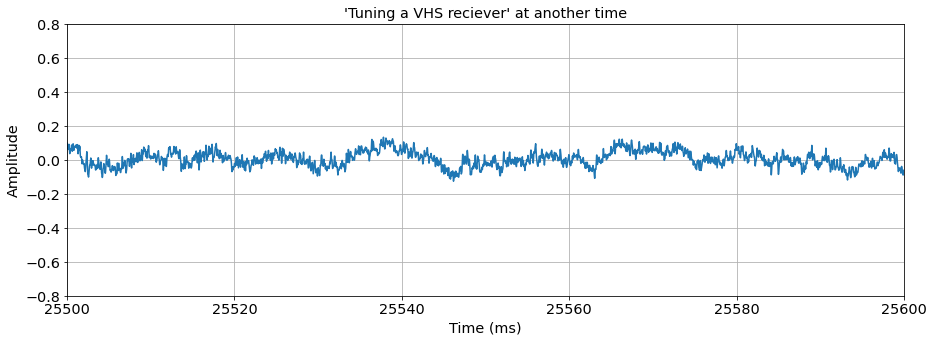

In [ ]:
plt.plot(sound2)
plt.title("'Tuning a VHS reciever' at another time")
plt.ylim([-0.8, 0.8])
plt.margins(x=0)
plt.xticks(np.arange(0,len(sound2)+1,int(len(sound2)/5)), np.arange(start_2,start_2 + range_limit +1,20))
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

**Reflection**

Comparing SOUND1 and SOUND2: 

- The frequency is quite low in SOUND1 with higher amplitude than SOUND2. 
- Where SOUND2 have quite alot of static noise.

3. For each of the segments you looked at above, window them, and compute their Fourier transforms. Plot their dB magnitude spectra. Appropriately label your axes with "Magnitude (dB)" and "Frequency (kHz)". The frequency axis **must be** in kiloHertz, and limited to 0 to the Nyquist frequency (half the sampling rate). Window the audio with 1) boxcar, or 2) Hann. (This means you will have create four plots in total, or two plots with two lines each.)

In [ ]:
def calc_decibel(x):
  ref = (2**16)/2
  x = np.abs(x)
  return 20 * np.log10(x/ref)

In [ ]:
def modified_data_for_plot(x):
  return np.abs(x[:int(len(x)/2)])

In [ ]:
def ms_to_samples(x):
  return int(x*sound.frame_rate/1000)

In [ ]:
def fft_in_db(audio, frame_rate, win):
  N = len(audio)
  T = N/frame_rate
  k = np.arange(N//2)
  freq = k/T
  sound_fft = np.fft.fft(audio*win)[:N//2]
  return librosa.amplitude_to_db(np.abs(sound_fft)), freq

In [ ]:
from scipy import signal

win_boxcar1 = signal.boxcar(len(sound1))
win_hann1 = signal.hann(len(sound1))

win_boxcar2 = signal.boxcar(len(sound2))
win_hann2 = signal.hann(len(sound2))

sound1_fft_boxcar, freq1b = fft_in_db(sound1, sound.frame_rate, win_boxcar1)
sound1_fft_hamm, freq1h = fft_in_db(sound1, sound.frame_rate, win_hann1)

sound2_fft_hamm, freq2b = fft_in_db(sound2, sound.frame_rate, win_hann2)
sound2_fft_boxcar, freq2h = fft_in_db(sound2, sound.frame_rate, win_boxcar2)

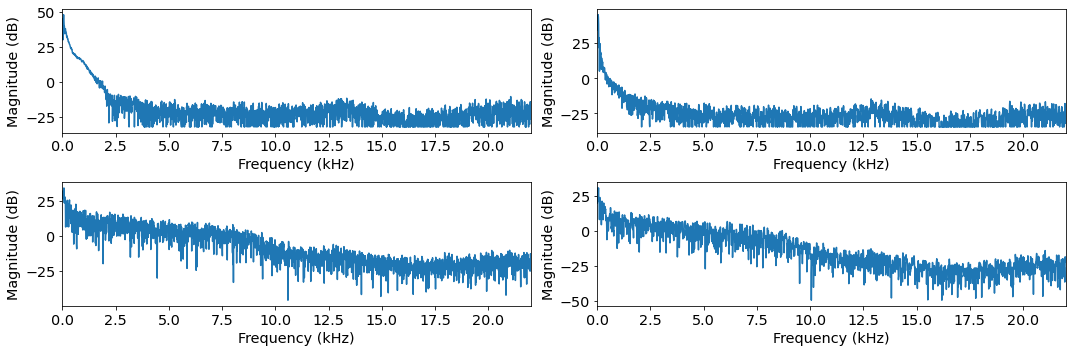

In [ ]:
# add your code below
fig, ax = plt.subplots(2,2)

ax[0, 0].plot(freq1b/1000, sound1_fft_boxcar)
ax[0, 1].plot(freq1h/1000, sound1_fft_hamm)
ax[1, 0].plot(freq2b/1000, sound2_fft_boxcar)
ax[1, 1].plot(freq2h/1000, sound2_fft_hamm)

for i in range(2):
  for j in range(2):
    ax[i, j].set_xlabel("Frequency (kHz)")
    ax[i, j].set_ylabel("Magnitude (dB)")
    ax[i, j].set_xlim(0, sound.frame_rate/1000//2)
    #ax[i, j].set_xticks(np.arange(0,N+1,int(N/5)))
    #ax[i, j].set_xticklabels(np.arange(0,N+1,int(N/5))/1000)
plt.tight_layout()
plt.show()

**Reflection**

SOUND1:
- By the Hann window there is a better smoothness to the graph which can be seen best at lower frequencies where the magnitute also is higher.

SOUND2:
- Here the sound graph does not differ that much. At least not visable to the naked eye.

4. For the first 10 seconds of your audio file, compute and plot its dB magnitude short-time Fourier transform using a Hann window of duration 25 ms with a window hopsize of 10 ms, and an FFT size of 8192 samples. Do the same using a Hann window of duration 100 ms with a window hopsize of 10 ms. Appropriately label your axes with "Frequency (kHz)" and "Time (s)". The frequency axis must be in kiloHertz, and limited to 0 to 5 kHz. The time axis must be in seconds. Choose a colormap that you feel describes your personality (https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html). See [scipy.signal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html) for help.

In [ ]:
from scipy import signal
# add your code below
sound_10_sec = sound_np[:,0]
frame_rate = sound.frame_rate
nfft = 8192

nperseg1 = ms_to_samples(25)
nperseg2 = ms_to_samples(100)
noverlap1 = nperseg1 - ms_to_samples(10)
noverlap2 = nperseg2 - ms_to_samples(10)

f1, t1, Zxx1 = signal.stft(sound_10_sec,
                           fs = frame_rate,
                           nperseg = nperseg1,
                           noverlap = noverlap1,
                           window = "hann", 
                           nfft = nfft,
                           return_onesided = True)

f2, t2, Zxx2 = signal.stft(sound_10_sec,
                           fs = frame_rate,
                           nperseg = nperseg2,
                           noverlap = noverlap2,
                           window = "hann", 
                           nfft = nfft,
                           return_onesided = True)





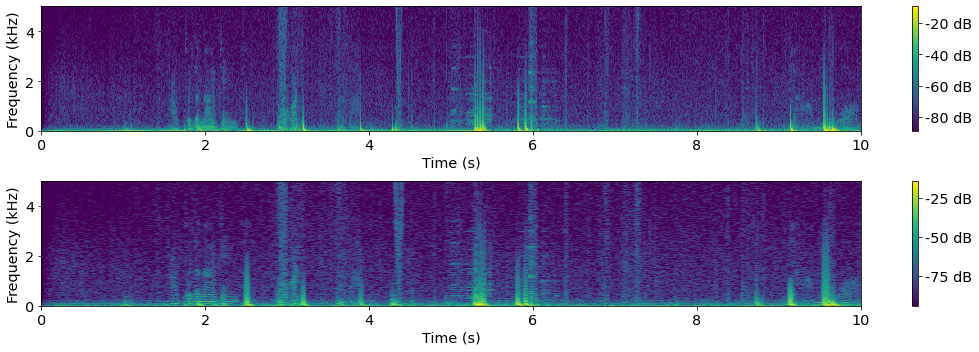

In [ ]:
fig, ax = plt.subplots(2,1)

img1 = ax[0].pcolormesh(t1, f1/1000, librosa.amplitude_to_db(np.abs(Zxx1)), shading='viridis')
img2 = ax[1].pcolormesh(t2, f2/1000, librosa.amplitude_to_db(np.abs(Zxx2)), shading='viridis')
img = [img1, img2]
y_lim = 5
for i in range(2):
  ax[i].set_ylabel("Frequency (kHz)")
  ax[i].set_xlabel("Time (s)")
  
  #ax[i].set_yticks(np.arange(0,y_lim+1,int(y_lim/5)))
  #ax[i].set_yticklabels(np.arange(0,y_lim+1,int(y_lim/5))/1000)
  ax[i].set_ylim((0,5))
  fig.colorbar(img[i], ax=ax[i], format='%+2.0f dB')
plt.tight_layout()
plt.show()
plt.close(fig)

**Reflection:**
Time smearing is evident when using a larger window size. However, the difference in frequency smearing is much less visible.

5. Describe some of the advantages and nackdelar of using short or long time windows for time-frequency analysis.

**Short time windows:** 
1. Advantages:
  - Less time smearing (good localization)
2. Disadvantages: 
  - More frequency smearing (bad localization)
**Long time windows:** 
1. Advantages:
  - Less frequency smearing (good localization)
2. Disadvantages: 
  - More time smearing (bad localization)

*As shown on page 101 in Fundamentals of Music Processing*

**KEY TAKE AWAY**
You cannot get both good localization of frequency and time. It's a trade-off between them. (*Varient of Heisenberg's Uncertainty Principle*)


6. For the first 10 seconds of your audio file, use the [librosa package](https://github.com/librosa) to compute its Mel spectrogram using Hann windows of duration 25 ms with a window hopsize of 10 ms. Use 128 Mel bands and an FFT size of 8192 samples. Display the dB magnitude with reference to the max power observed, and limit your y-axis between 0 and 5 kHz. Use the same colormap as you used above. See https://github.com/librosa/librosa/blob/main/examples/LibROSA%20demo.ipynb for help. 

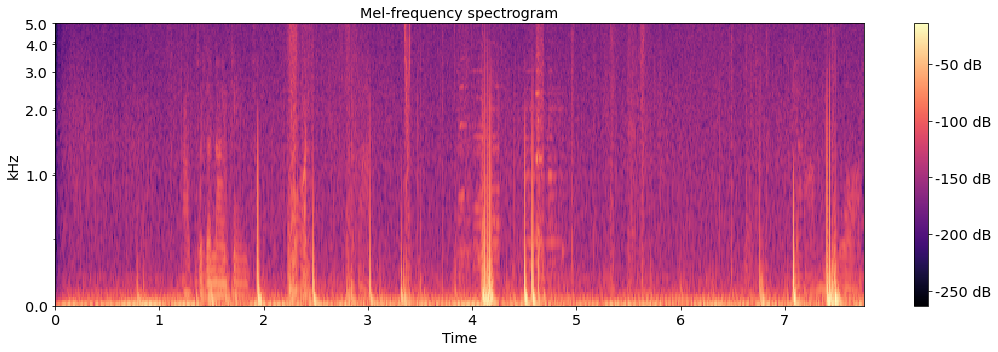

In [ ]:
import librosa
import librosa.display

# add your code below

sound_10_sec = sound_np[:,0]
frame_rate = sound.frame_rate
nfft = 8192
window_size = ms_to_samples(25)
mel_bands = 128
window_overlap = window_size - ms_to_samples(10)
y_lim = 5000
mel_gram = librosa.feature.melspectrogram(sound_10_sec,
                                          sr = frame_rate,
                                          n_fft = nfft,
                                          hop_length = window_overlap,
                                          win_length = window_size,
                                          n_mels = mel_bands,
                                          fmax = y_lim)

fig, ax = plt.subplots()
img = librosa.display.specshow(calc_decibel(mel_gram), x_axis='time',
                         y_axis='mel', sr=frame_rate,
                         fmax=y_lim, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set_yticks(np.arange(0,y_lim+1,int(y_lim/5)))
ax.set_yticklabels(np.arange(0,y_lim+1,int(y_lim/5))/1000)
ax.set_ylabel("kHz")
ax.set_title("Mel-frequency spectrogram")
plt.tight_layout()
plt.show()
plt.close(fig)


**Reflection:**
The mel-frequncy spectrogram resembles the previous exercise spectrogram which to me indicates that previous method was the same.

# Part 2: Extracting features

1. Write a function that will take in the samples of an audio file, a frame size in samples, a frame hop size in samples, and compute and return the number of waveform zero crossings in each frame. A waveform x[n] undergoes a zero crossing when sign(x[n]) and sign(x[n+1]) are different. You will have to slice x[n] into chunks of a specified size, and for each of those chunks, count the number of sign changes.

In [ ]:
# add your code below
def zero_crossing(audio, frame_size, hop_size):
  assert(frame_size > hop_size)
  i = 0
  n_zc_frame = 0
  N = len(audio)
  n_zc = list()
  while True:
    idx = i*(frame_size-hop_size)
    segment = audio[idx: idx+frame_size]
    for j in range(len(segment)-1):
      if segment[j]*segment[j+1] < 0:
        n_zc_frame += 1
    n_zc.append(n_zc_frame)
    if idx+frame_size >= N:
      break
    i += 1
    n_zc_frame = 0
  return np.asarray(n_zc)

2. Using your function, compute zero crossings of 46 ms frames hopped 50% of that for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds of your time domain waveform, and plot the series of zero crossings you extracted.

In [ ]:
# add your code below
zc_count = zero_crossing(sound_10_sec, int(46*sound.frame_rate/1000), int(46/2*sound.frame_rate/1000))

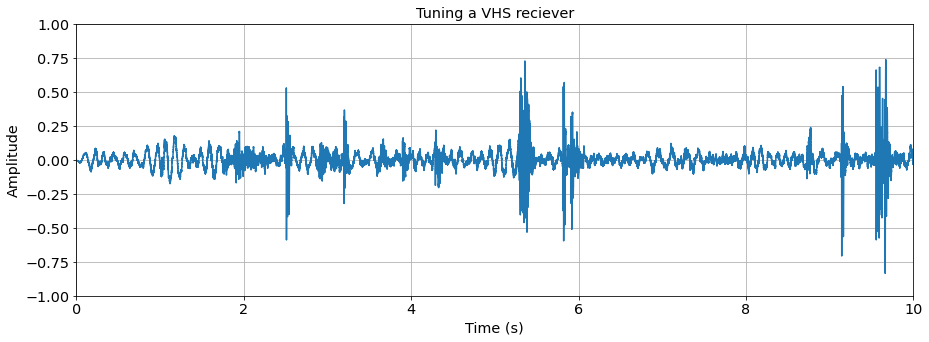

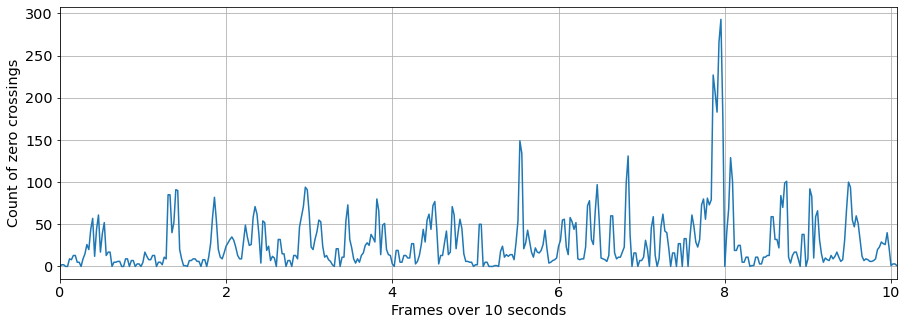

In [ ]:
plt.plot(sound_10_sec)
#plt.plot(sound_np[:,1])
plt.title("Tuning a VHS reciever")
plt.ylim([-1, 1])
plt.margins(x=0)
plt.xticks(np.arange(0,len(sound_10_sec)+1,int(len(sound_10_sec)/5)), np.arange(0,10+1,2))
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

plt.plot(zc_count)
plt.margins(x=0)
plt.xticks(np.arange(0,len(zc_count)+1,int(len(zc_count)/5)), np.arange(0,10+1,2))
plt.xlabel("Frames over 10 seconds")
plt.ylabel("Count of zero crossings")
plt.grid()
plt.show()

3. Write a function that will take in the samples of an audio file, a frame size in samples, a hop size in samples, and a sampling rate, and compute and return the spectral centroid of each frame. The spectral centroid of a rectangular window of audio $x[n]$ of length $N$ (even) is defined as 
$$ R_{0.5}(x) = \frac{\sum_{k=0}^{N/2+1} \frac{F_s k}{N} |X[k]|}{\sum_{k=0}^{N/2+1} |X[k]|} $$
where $X[k]$ is the DFT of $x[n]$, and $F_s$ is the sampling rate.

In [ ]:
# add your code below
def spectral_centroid(audio, frame_size, hop_size, sampling_rate):
  assert(frame_size%2 == 0)

  i = 0
  N = len(audio)
  spec_centroid = list()

  while True:
    idx = i*(frame_size-hop_size)
    segment = audio[idx: idx+frame_size]

    if len(segment)< frame_size:
      break

    last_idx = int(frame_size/2+1)
    fft_segment = np.abs(np.fft.fft(segment))[:last_idx]
    weighted_segment = sampling_rate*fft_segment*np.arange(0, last_idx)/frame_size
    spec_centroid.append(np.sum(weighted_segment)/np.sum(fft_segment))

    i += 1
  return np.asarray(spec_centroid)


4. Using your function, compute spectral centroid features for contiguous 46 ms frames hopped 50% for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds of your time domain waveform, and plot the series of spectral centroids you extracted.

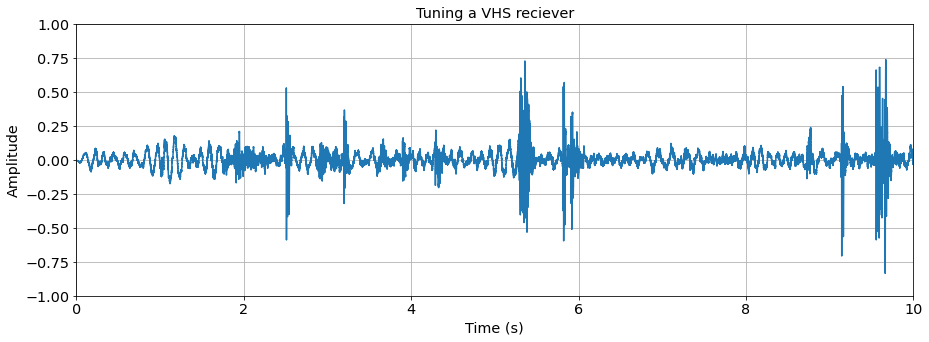

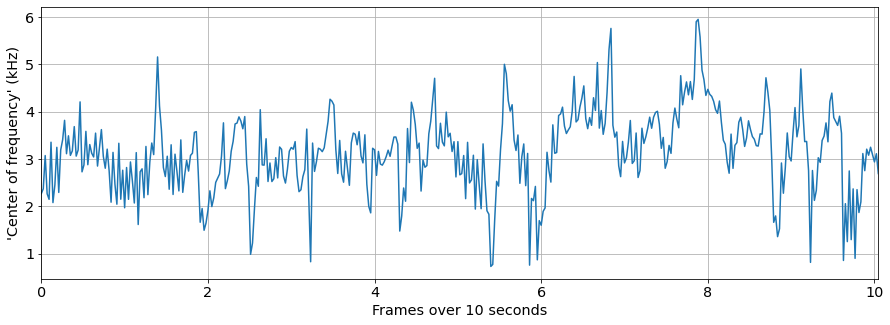

In [ ]:
plt.plot(sound_10_sec)
#plt.plot(sound_np[:,1])
plt.title("Tuning a VHS reciever")
plt.ylim([-1, 1])
plt.margins(x=0)
plt.xticks(np.arange(0,len(sound_10_sec)+1,int(len(sound_10_sec)/5)), np.arange(0,10+1,2))
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# add your code below
spec_centroid = spectral_centroid(sound_10_sec, int(46*sound.frame_rate/1000), int(46/2*sound.frame_rate/1000), sound.frame_rate)
plt.plot(spec_centroid/1000)
plt.margins(x=0)
plt.xticks(np.arange(0,len(spec_centroid)+1,int(len(spec_centroid)/5)), np.arange(0,10+1,2))
plt.xlabel("Frames over 10 seconds")
plt.ylabel("'Center of frequency' (kHz)")
plt.grid()
plt.show()

**Reflection**
As a spectral centroid of a frame represents the center of the frequencies in that frame. One can distinguish that most of the frequencies lies around 3kHz with the max at 6kHz and min at 1kHz.

5. Using the librosa package (https://github.com/librosa), extract the first 10 MFCC features from your audio file using Hann windows of 25 ms duration and 10 ms hop size, and an FFT size of 8192 samples. Display the extracted MFCCs for the first 10 seconds.

In [ ]:
# add your code below
mfcc = librosa.feature.mfcc(sound_10_sec, 
                            sr = sound.frame_rate, 
                            window = "hann",
                            hop_length = ms_to_samples(10),
                            win_length = ms_to_samples(25),
                            n_fft = 8192,
                            n_mfcc = 10)



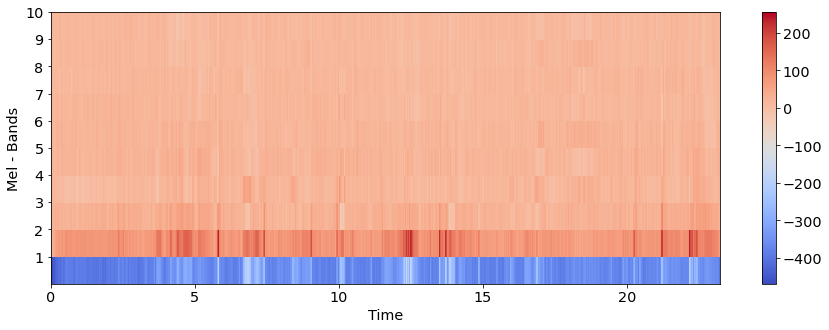

In [ ]:
fig, ax = plt.subplots(1)
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
ax.set_yticks(np.arange(1, 11))
ax.set_ylabel("Mel - Bands")
fig.colorbar(img, ax=ax)
plt.show()

**Reflection:**

As the Mel-frequency cepstral coefficients are the coefficients of mel-frequency cepstrum. The MFCC are then the features of this spectrum which can be used for classification. In other words, these MFCC coefficients are description of the spectrum on a mel-scale which human can hear. 
